In [4]:
# !nvcc --version
# !nvidia-smi

import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob


In [5]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200
from cellpose import utils, io

In [6]:
from cellpose import io

io.logger_setup() # run this to get printing of progress

# DEFINE CELLPOSE MODEL WITH SIZE
# model_type='cyto3' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type="cyto3")


2024-10-05 21:55:35,999 [INFO] WRITING LOG OUTPUT TO /Users/neilblake/.cellpose/run.log
2024-10-05 21:55:35,999 [INFO] 
cellpose version: 	3.0.11 
platform:       	darwin 
python version: 	3.12.5 
torch version:  	2.4.1
2024-10-05 21:55:36,000 [INFO] >>>> using CPU
2024-10-05 21:55:36,001 [INFO] >>>> using CPU
2024-10-05 21:55:36,001 [INFO] >> cyto3 << model set to be used
2024-10-05 21:55:36,002 [INFO] WARNING: MKL version on torch not working/installed - CPU version will be slightly slower.
2024-10-05 21:55:36,002 [INFO] see https://pytorch.org/docs/stable/backends.html?highlight=mkl
2024-10-05 21:55:36,113 [INFO] >>>> loading model /Users/neilblake/.cellpose/models/cyto3
2024-10-05 21:55:36,167 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


/Users/neilblake/development/cell_insights/.venv/lib/python3.12/site-packages/cellpose/resnet_torch.py:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

In [39]:
model.backbone


AttributeError: 'CellposeModel' object has no attribute 'backbone'

In [7]:

from PIL import Image
import numpy as np
from cellpose import transforms, plot

import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200
from cellpose import utils, io

titles = [
        "Cellpose", "Nuclei", "Tissuenet", "Livecell", "YeaZ",
         "Omnipose\nphase-contrast", "Omnipose\nfluorescent",
        "DeepBacs"
    ]

image_path = 'L11_s1_w2.png'  # Replace with the actual path to your image

try:
  image = Image.open(image_path)
  image_np = np.array(image)
  print("Image read successfully!")
except FileNotFoundError:
  print(f"Error: Image file not found at {image_path}")


Image read successfully!


In [8]:
imgs = [image_np]

In [9]:
imgs

[array([[334, 288, 322, ..., 473, 463, 444],
        [348, 365, 344, ..., 468, 449, 420],
        [374, 383, 357, ..., 440, 447, 417],
        ...,
        [362, 383, 324, ..., 535, 600, 514],
        [324, 364, 386, ..., 510, 542, 519],
        [361, 395, 325, ..., 531, 493, 518]], dtype=uint16)]

In [24]:
# model = models.CellposeModel(gpu=False, model_type="livecell_cp3")
model = models.CellposeModel(gpu=True, model_type="cyto3")

2024-10-05 22:02:27,423 [INFO] >> cyto3 << model set to be used
2024-10-05 22:02:27,433 [INFO] ** TORCH MPS version installed and working. **
2024-10-05 22:02:27,434 [INFO] >>>> using GPU (MPS)
2024-10-05 22:02:27,607 [INFO] >>>> loading model /Users/neilblake/.cellpose/models/cyto3


/Users/neilblake/development/cell_insights/.venv/lib/python3.12/site-packages/cellpose/resnet_torch.py:276: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

2024-10-05 22:02:28,017 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


In [27]:

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus
# OR if you have different types of channels in each image
# channels = [[2,3], [0,0], [0,0]]

# FOR A CUSTOM MODEL OR OTHER BUILT-IN MODEL:

masks_pred, flows, styles = model.eval(imgs, diameter=0, channels=[0,0],
                                              niter=2000) # using more iterations for bacteria


In [40]:

masks_pred2, flows2, styles2 = model.eval(imgs, channels=[0,0],
                                              niter=200) # using more iterations for bacteria


/Users/neilblake/development/cell_insights/.venv/lib/python3.12/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


In [28]:

masks_pred2, flows2, styles2 = model.eval(imgs, diameter=39, channels=[0,0],
                                              niter=200) # using more iterations for bacteria


In [32]:
import os
from skimage import io
import numpy as np

def save_detected_cells(masks_pred, image_np, output_dir='detected_cells'):
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Get unique cell IDs (excluding 0, which is typically background)
    unique_cells = np.unique(masks_pred[0])[1:]
    
    for cell_id in unique_cells:
        # Create a binary mask for the current cell
        cell_mask = (masks_pred[0] == cell_id)
        
        # Find the bounding box of the cell
        rows, cols = np.where(cell_mask)
        top, bottom, left, right = rows.min(), rows.max(), cols.min(), cols.max()
        
        # Extract the cell from the original image
        cell_image = image_np[top:bottom+1, left:right+1]
        
        # Apply the mask to keep only the cell pixels
        cell_mask_cropped = cell_mask[top:bottom+1, left:right+1]
        
        # Ensure cell_image and cell_mask_cropped have the same number of dimensions
        if len(cell_image.shape) == 3 and len(cell_mask_cropped.shape) == 2:
            cell_mask_cropped = cell_mask_cropped[:, :, np.newaxis]
        
        # Apply the mask to keep only the cell pixels
        masked_cell = cell_image * cell_mask_cropped
        
        # Normalize the image to use full range of uint8
        masked_cell = ((masked_cell - masked_cell.min()) / (masked_cell.max() - masked_cell.min()) * 255).astype(np.uint8)
        
        # Save the cell image with bounding box coordinates in the filename
        cell_filename = os.path.join(output_dir, f'cell_{cell_id}_bbox_{top}_{bottom}_{left}_{right}.png')
        io.imsave(cell_filename, masked_cell)
    
    print(f"Saved {len(unique_cells)} detected cells to {output_dir}")

# # Save detected cells from the first mask prediction
# save_detected_cells(masks_pred, image_np)

# Save cells from the second mask prediction as well
save_detected_cells(masks_pred2, image_np, output_dir='detected_cells_2')


Saved 1578 detected cells to detected_cells_2


In [33]:
# Save masks_pred2 using numpy's save function
np.save('masks_pred2.npy', masks_pred2)

print("masks_pred2 has been saved as 'masks_pred2.npy'")


masks_pred2 has been saved as 'masks_pred2.npy'


In [34]:
# Load masks_pred2 from the saved file
masks_pred2 = np.load('masks_pred2.npy')

print("Shape of masks_pred2:", masks_pred2.shape)
print("Unique values in masks_pred2:", np.unique(masks_pred2))
print("Number of detected cells:", len(np.unique(masks_pred2)) - 1)  # Subtract 1 to exclude background (0)


Shape of masks_pred2: (1, 2048, 2048)
Unique values in masks_pred2: [   0    1    2 ... 1576 1577 1578]
Number of detected cells: 1578


In [15]:
def plot_mask(masks_pred, image_np, alpha=0.4):# Overlay masks_pred on the image
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(1, 1, 1)

    # Display the original image
    if len(image_np.shape) == 2:  # If grayscale
        ax.imshow(image_np, cmap='gray')
    else:  # If RGB
        ax.imshow(image_np)

    # Overlay the predicted masks
    mask_overlay = masks_pred[0]  # Assuming we're using the first predicted mask
    mask_rgb = np.zeros((*mask_overlay.shape, 3), dtype=np.uint8)

    # Create a colormap for unique cell IDs
    unique_cells = np.unique(mask_overlay)[1:]  # Exclude 0 (background)
    colors = plt.cm.jet(np.linspace(0, 1, len(unique_cells)))

    for cell_id, color in zip(unique_cells, colors):
        mask_rgb[mask_overlay == cell_id] = (np.array(color[:3]) * 255).astype(np.uint8)

    # Overlay the mask with some transparency
    ax.imshow(mask_rgb, alpha=alpha)

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.title("Image with Cellpose Masks Overlay")
    plt.show()


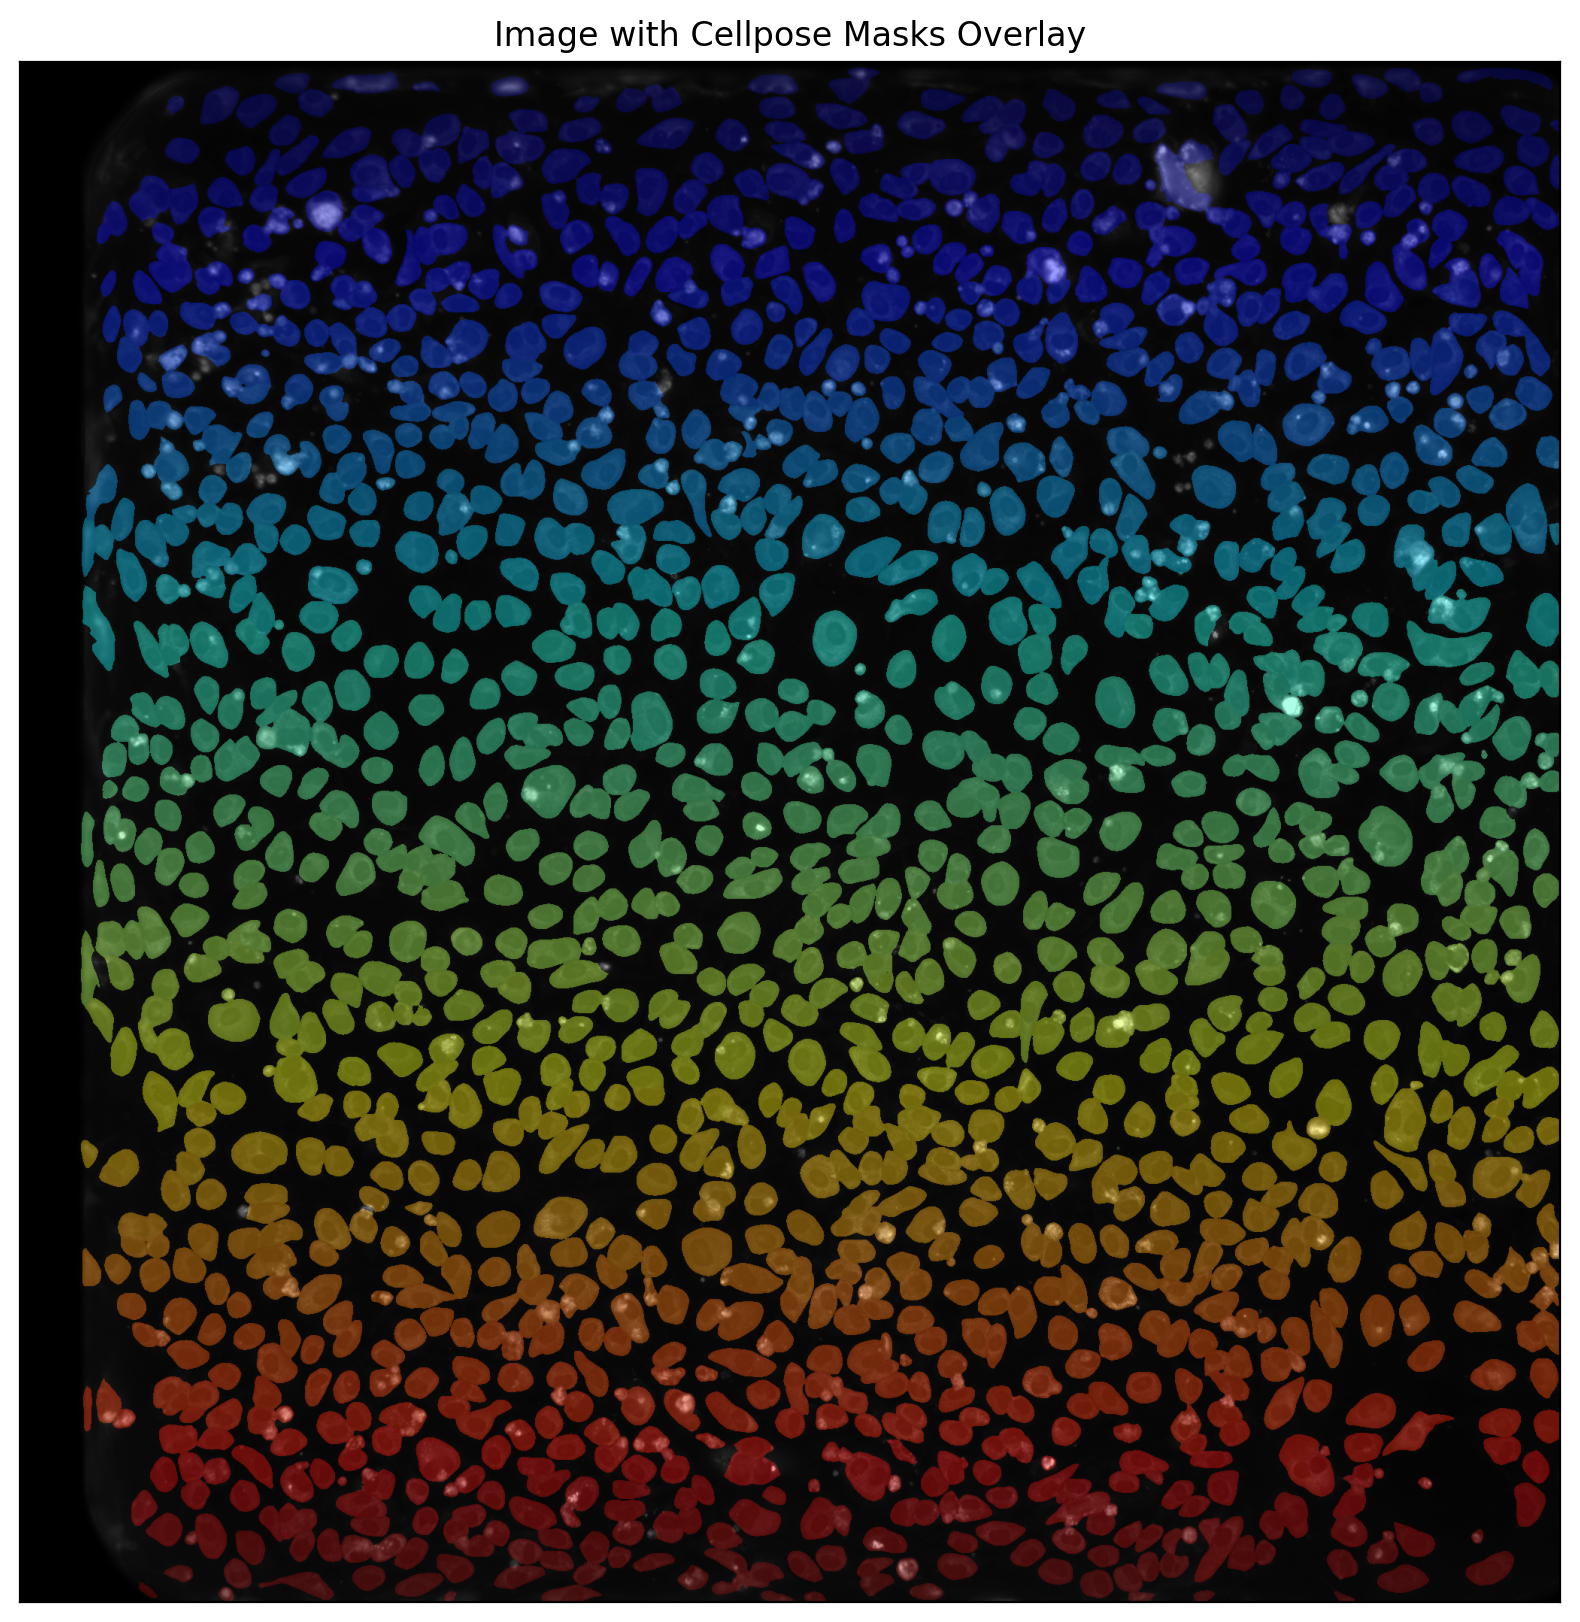

In [35]:
plot_mask(masks_pred2, image_np)

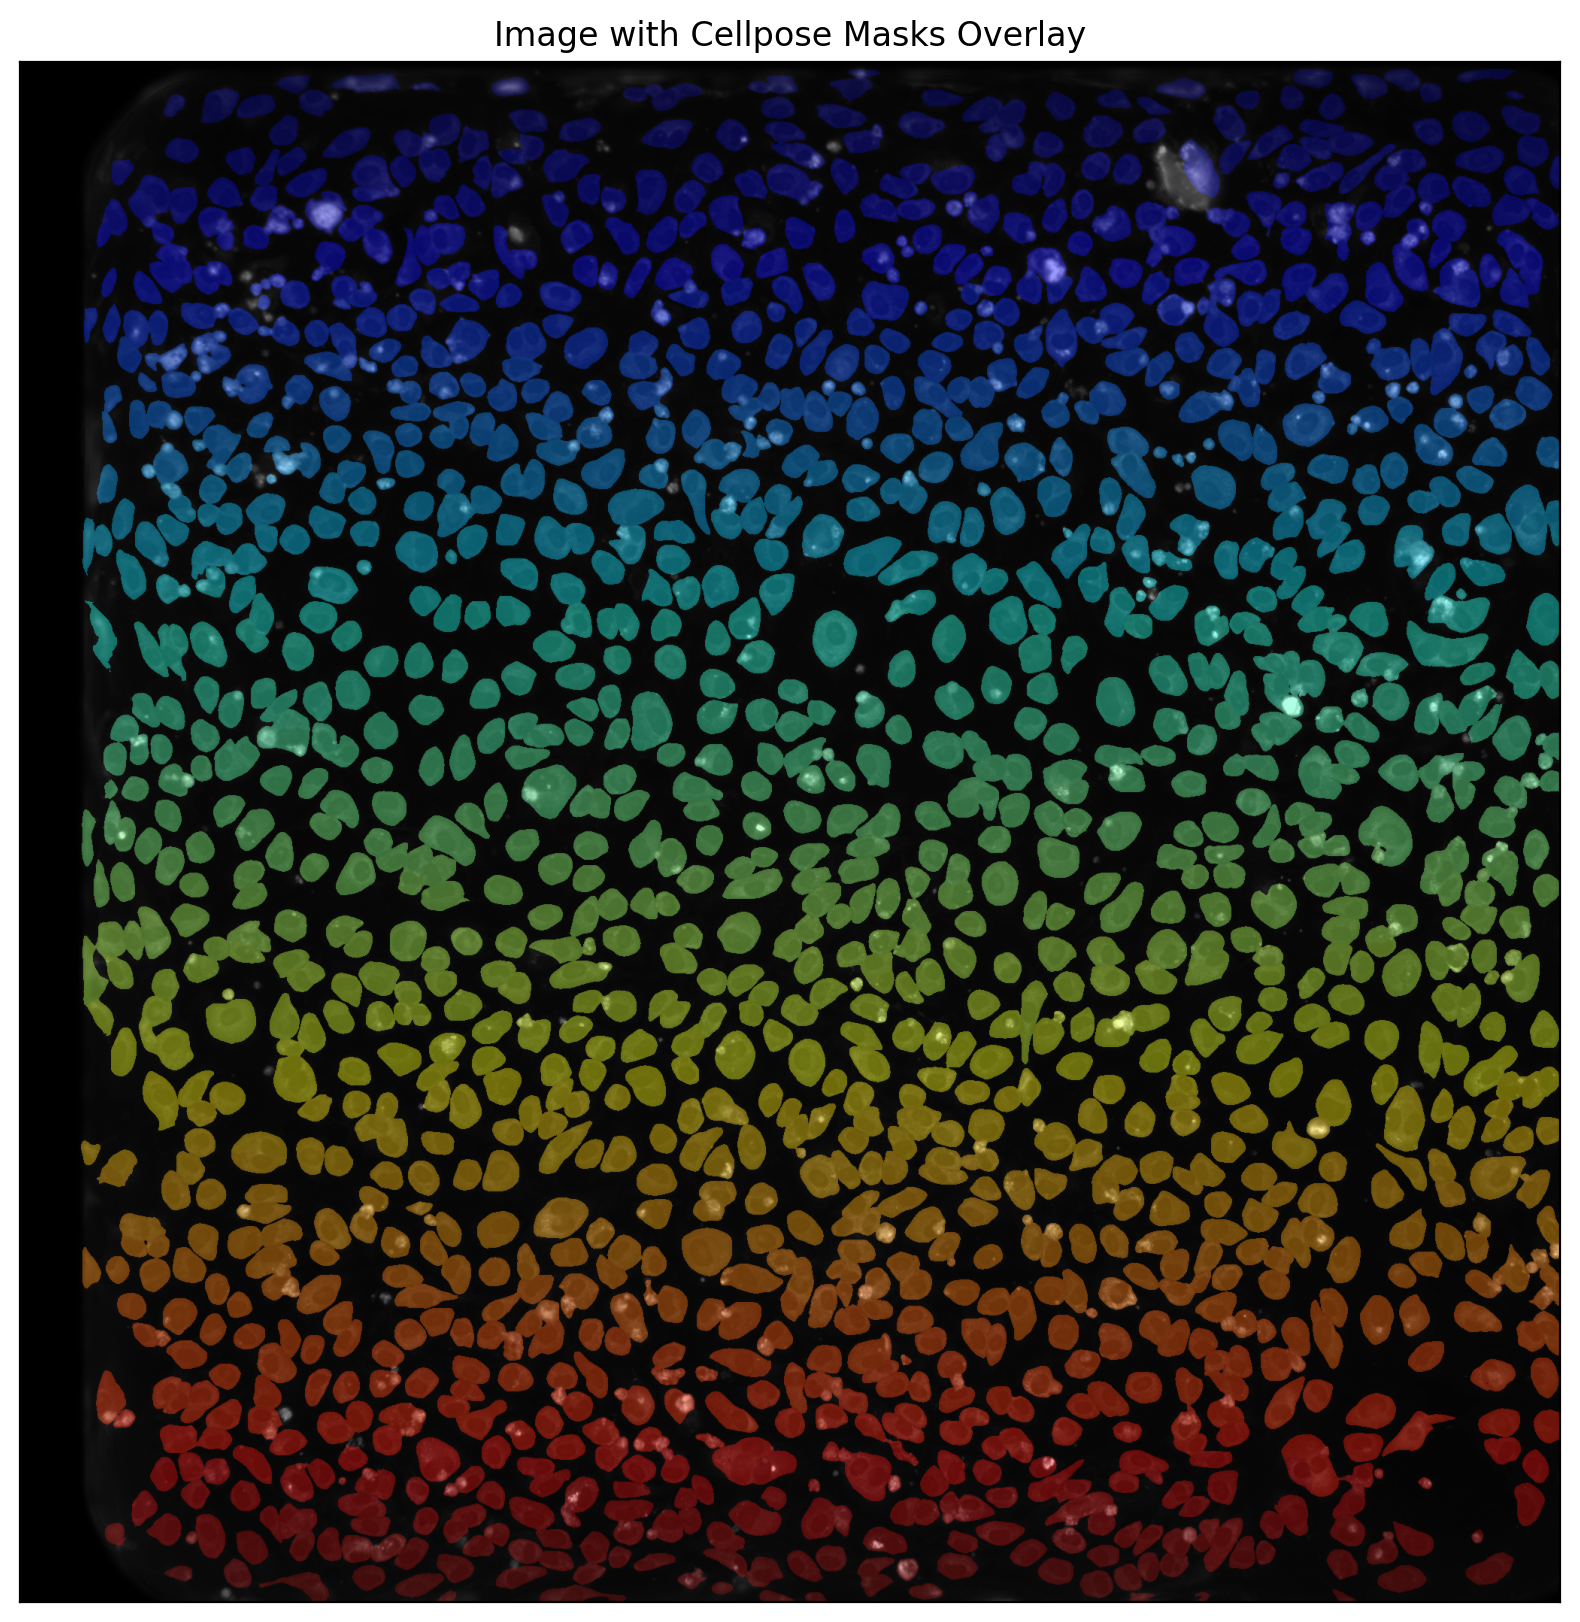

In [30]:
plot_mask(masks_pred, image_np)

In [ ]:
def plot_mask(masks_pred, image_np):# Overlay masks_pred on the image
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)

# Display the original image
if len(image_np.shape) == 2:  # If grayscale
    ax.imshow(image_np, cmap='gray')
else:  # If RGB
    ax.imshow(image_np)

# Overlay the predicted masks
mask_overlay = masks_pred[0]  # Assuming we're using the first predicted mask
mask_rgb = np.zeros((*mask_overlay.shape, 3), dtype=np.uint8)

# Create a colormap for unique cell IDs
unique_cells = np.unique(mask_overlay)[1:]  # Exclude 0 (background)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_cells)))

for cell_id, color in zip(unique_cells, colors):
    mask_rgb[mask_overlay == cell_id] = (np.array(color[:3]) * 255).astype(np.uint8)

# Overlay the mask with some transparency
ax.imshow(mask_rgb, alpha=0.1)

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

plt.title("Image with Cellpose Masks Overlay")
plt.show()


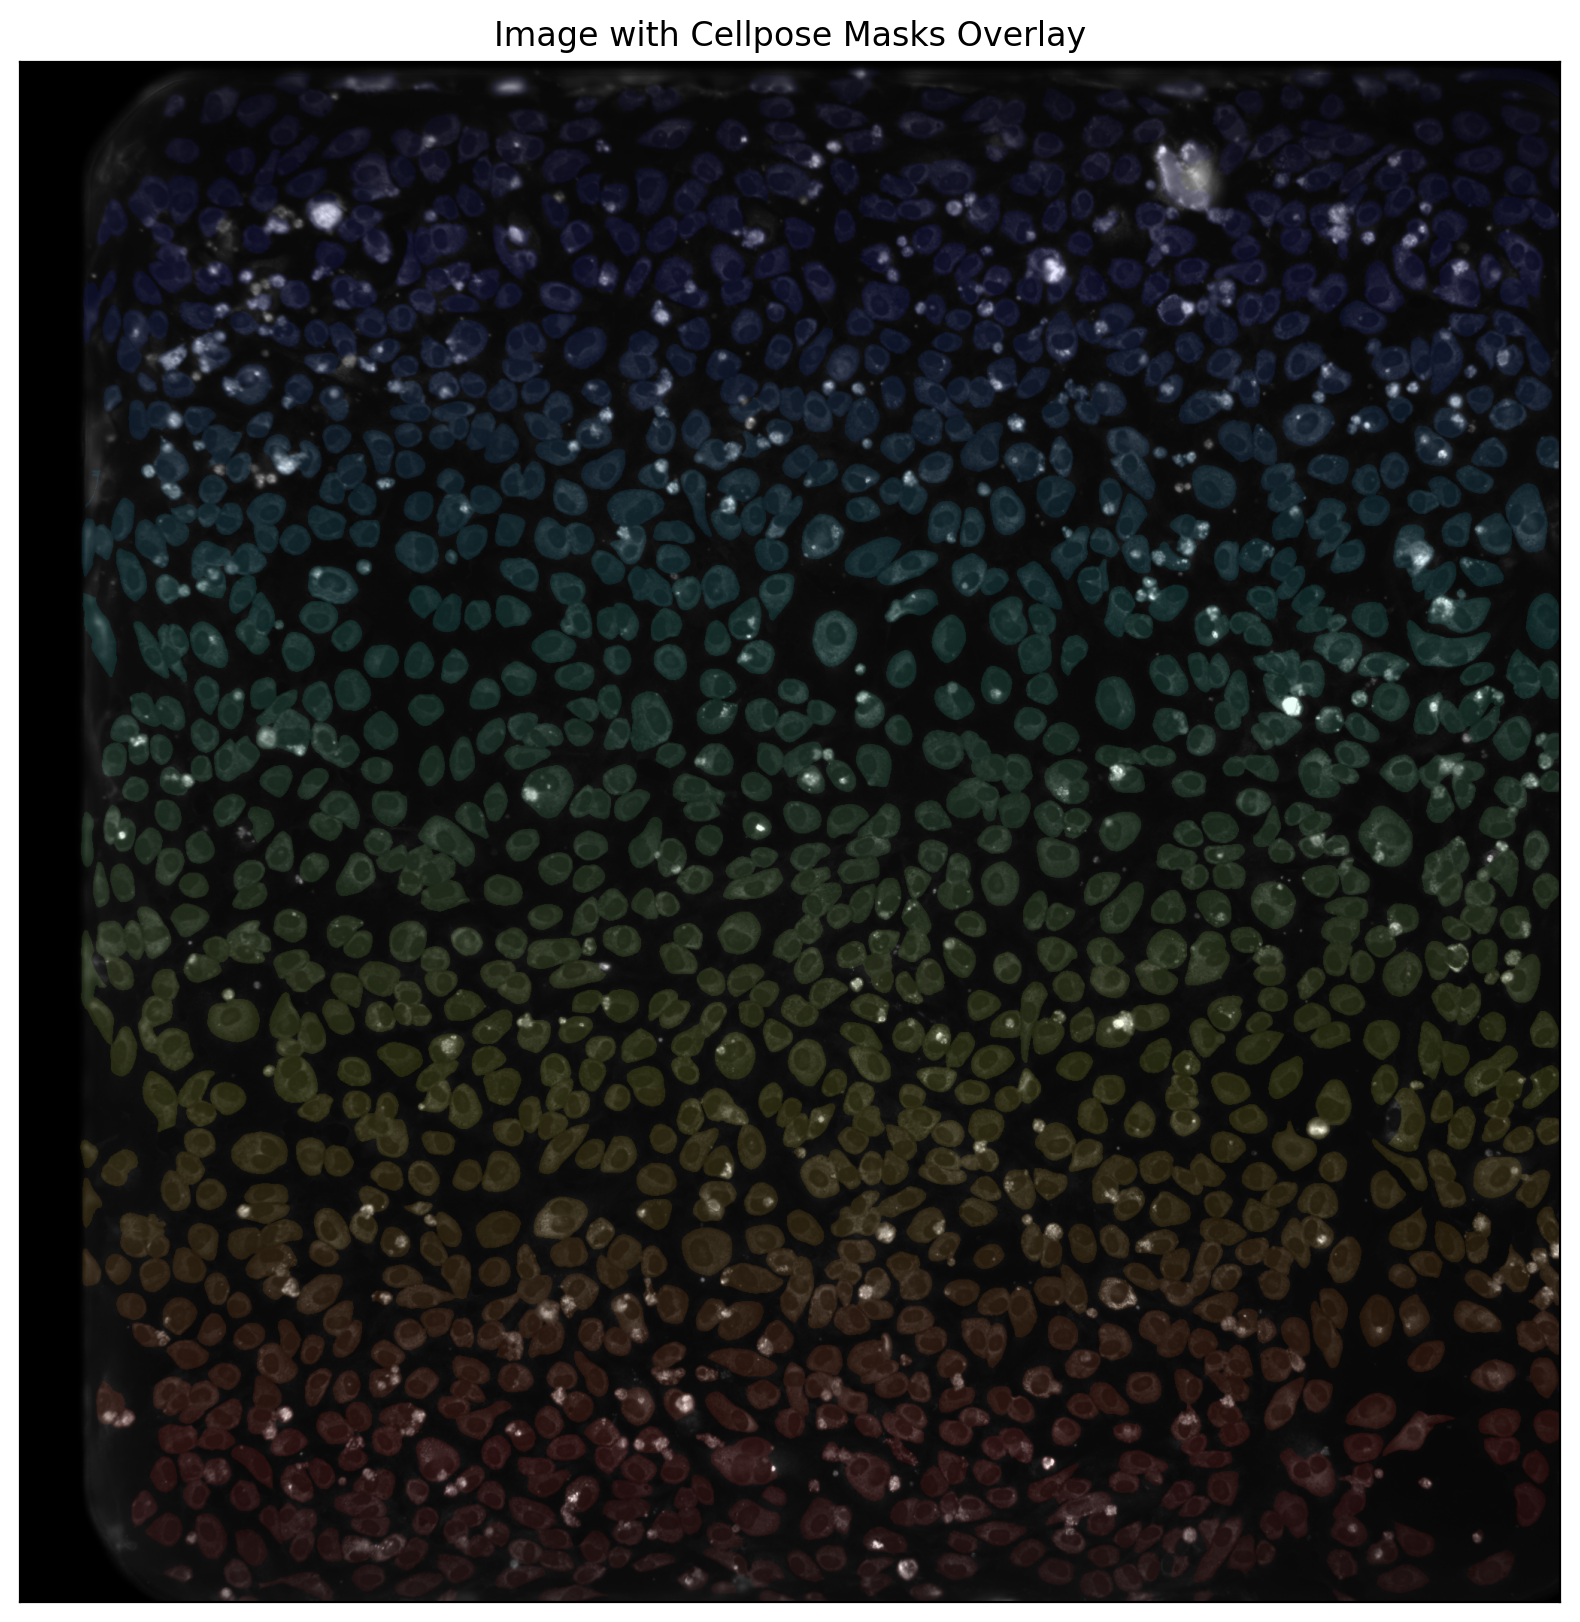

In [14]:
# Overlay masks_pred on the image
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)

# Display the original image
if len(image_np.shape) == 2:  # If grayscale
    ax.imshow(image_np, cmap='gray')
else:  # If RGB
    ax.imshow(image_np)

# Overlay the predicted masks
mask_overlay = masks_pred[0]  # Assuming we're using the first predicted mask
mask_rgb = np.zeros((*mask_overlay.shape, 3), dtype=np.uint8)

# Create a colormap for unique cell IDs
unique_cells = np.unique(mask_overlay)[1:]  # Exclude 0 (background)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_cells)))

for cell_id, color in zip(unique_cells, colors):
    mask_rgb[mask_overlay == cell_id] = (np.array(color[:3]) * 255).astype(np.uint8)

# Overlay the mask with some transparency
ax.imshow(mask_rgb, alpha=0.1)

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

plt.title("Image with Cellpose Masks Overlay")
plt.show()


In [ ]:
# image_np = np.repeat(image_np[:, :, np.newaxis], 2048, axis=2)
# image_np.shape

ValueError: axes don't match array

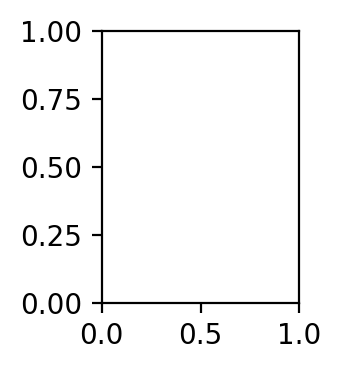

In [11]:
plt.figure(figsize=(12,6))
ly = 400
iex = 1
img = image_np
img = np.clip(img, 0, 1) # normalize images across channel axis
# img = np.clip(transforms.normalize_img(img, axis=0), 0, 1) # normalize images across channel axis
# img = np.clip(transforms.normalize_img(img, axis=0), 0, 1) # normalize images across channel axis
ax = plt.subplot(3, 8, (iex%3)*8 + (iex//3) +1)
if img[1].sum()==0:
    img = img[0]
    ax.imshow(img, cmap="gray")
else:
    # make RGB from 2 channel image
    img = np.concatenate((np.zeros_like(img)[:1], img), axis=0).transpose(1,2,0)
    ax.imshow(img)
ax.set_ylim([0, min(400, img.shape[0])])
ax.set_xlim([0, min(400, img.shape[1])])


# GROUND-TRUTH = PURPLE
# PREDICTED = YELLOW
outlines_gt = utils.outlines_list(masks_true[iex])
outlines_pred = utils.outlines_list(masks_pred[iex])
for o in outlines_gt:
    plt.plot(o[:,0], o[:,1], color=[0.7,0.4,1], lw=0.5)
for o in outlines_pred:
    plt.plot(o[:,0], o[:,1], color=[1,1,0.3], lw=0.75, ls="--")
plt.axis('off')

if iex%3 == 0:
    ax.set_title(titles[iex//3])

plt.tight_layout()
plt.show()